In [1]:
basedir = '/home/abhinavgupta0110/NeuralODEs_ROM_Closure'

import os

is_google_colab = False

### Mount the Google drive if needed

In [2]:
if is_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    
    %pip install quadpy

os.chdir(os.path.join(basedir, 'neuralDDE_ROM_Closure'))

In [3]:
from src.solvers.neuralDDE_with_adjoint import history

import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
os.chdir(basedir)

In [5]:
save_dir = 'Analysis/AD_Eqn_ROM/compare_loss_final_paper'

In [6]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [7]:
class args:
    def __init__(self, model_dir):
        self.model_dir = model_dir

In [8]:
class avg_loss:

    def __init__(self, epoch_start, epoch_end):
        self.epoch_start = epoch_start
        self.epoch_end = epoch_end

    def compute_avg_loss(self, model_dir):

        loss_history = history(args(model_dir))
        loss_history.read()
        
        return np.mean(loss_history.val_loss[self.epoch_start:self.epoch_end])

In [9]:
model_dirs = ['ROM_nODE_testcase/model_dir_case16', 'ROM_nDistDDE_testcase/model_dir_case47', 'ROM_nDistDDE_testcase/model_dir_case48b', 'ROM_nDistDDE_testcase/model_dir_case45', 'ROM_nDistDDE_testcase/model_dir_case49', 'ROM_nDistDDE_testcase/model_dir_case50', 'ROM_nDistDDE_testcase/model_dir_case59']

delay_values = np.array([0., 0.025, 0.075, 0.125, 0.175, 0.250, 0.35])

In [10]:
avg_loss_obj = avg_loss(150, 200)
avg_loss_val = []

for i in range(len(model_dirs)):
    avg_loss_val.append(avg_loss_obj.compute_avg_loss(model_dirs[i]))


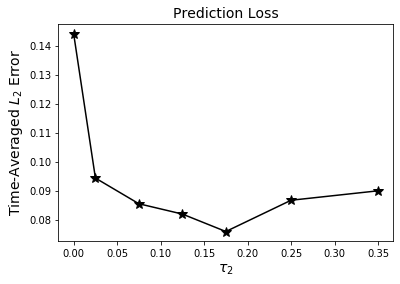

In [11]:
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = fig.add_subplot(111)

ax.cla()
ax.set_title('Prediction Loss', fontsize=14)
ax.set_xlabel('$\\tau_2$', fontsize=14)
ax.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)

ax.plot(delay_values, np.array(avg_loss_val), 'k-*', linewidth=1.5, markersize=10)

plt.show() 